
El siguiente programa se utiliza para resolver un sistema de Ecuaciones Diferenciales Ordinarias lineales y de primer orden, del tipo:

$$x'=a*x + b*y$$

$$y'=c*x + d*y$$

donde, $$a,b,c, d$$ son constantes.

Por tanto, este programa, encuentra las soluciones x(t) y y(t), a partir de una condición inicial. Gráfica las trayectorias y también el diagrama de fase.

El programa lo único que pide son los valores de a,b,c y d, y la condición inicial.

**Elaborado por:** Moonira Vásquez y Antonio Trávez




#Librerias

In [1]:
import numpy as np
import sympy as sp
from sympy import symbols
import matplotlib.pyplot as plt


#Funciones

##Función para pedir al usuario la matriz y las condiciones iniciales

In [2]:
def es_numero(valor):
    """Función para verificar si el valor ingresado es un número."""
    try:
        float(valor)  # Intentamos convertirlo a número
        return True
    except ValueError:
        return False

def ingresar_matriz():
    """Función para ingresar una matriz 2x2 y verificar que los valores sean números."""
    print("Ingresa los valores para la matriz 2x2:")
    print("M = [ a  b ]")
    print("    [ c  d ]")

    # Definir los nombres de las posiciones de la matriz
    posiciones = ['a', 'b', 'c', 'd']
    valores = []

    # Pedir los valores para cada posición de la matriz
    for idx in range(4):
        while True:
            valor = input(f"Ingrese el valor de {posiciones[idx]}: ")
            if es_numero(valor):
                valores.append(float(valor))  # Convertimos a float
                break
            else:
                print("¡Error! Ingresa un número válido.")

    # Convertir la lista de valores en un np.array 2x2
    matriz = np.array(valores).reshape(2, 2)
    return matriz

def ingresar_condiciones():
    """Función para ingresar los valores de t, x0, y0 y verificar que sean números."""
    while True:
        t0 = input("Ingresa el valor de t: ")
        if es_numero(t0):
            t0 = float(t0)
            break
        else:
            print("¡Error! Ingresa un número válido para t.")

    while True:
        x0 = input("Ingresa el valor de x0: ")
        if es_numero(x0):
            x0 = float(x0)
            break
        else:
            print("¡Error! Ingresa un número válido para x0.")

    while True:
        y0 = input("Ingresa el valor de y0: ")
        if es_numero(y0):
            y0 = float(y0)
            break
        else:
            print("¡Error! Ingresa un número válido para y0.")

    return t0, x0, y0

##Funcion para clasificar los valores propios

In [3]:
def classify_eigenvalues(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)

    # Verificar si los valores propios tienen una pequeña parte imaginaria
    eigenvalues = np.where(np.abs(eigenvalues.imag) < 1e-8, eigenvalues.real, eigenvalues)

    # Comprobar si son reales o imaginarios
    if np.iscomplex(eigenvalues).any():
        category = "Valores propios imaginarios"
    elif abs(eigenvalues[0] - eigenvalues[1]) < 1e-8:
        category = "Valores propios iguales"
    else:
        category = "Valores propios desiguales"

    return eigenvalues, eigenvectors, category

##Funciones para valores propios desiguales

###Funciones para encontrar la solución

In [4]:
#Función para resolver el sistema de EDOs y encontrar el valor de las constantes utilizando la condición inicial
def solve_initial_conditions(eigenvalues,eigenvectors,t0, x0, y0):
  o, p = symbols('C_1 C_2')
  t=t0
  z=sp.Matrix([o * sp.exp(eigenvalues[0] * t), p * sp.exp(eigenvalues[1] * t)])
  result = sp.Matrix(eigenvectors) * z
  x=result[0]
  y=result[1]
  # Definir las ecuaciones
  eq1 = sp.Eq(x, x0)
  eq2 = sp.Eq(y, y0)

  # Resolver para c1 y c2
  solution = sp.solve((eq1, eq2), (o, p))
  return solution

#Función para presentar las soluciones
def pres_resul(arr,mat):
  eigenvalues, eigenvectors, category = classify_eigenvalues(mat)
  t= symbols('t')

  # Contador para generar los nombres de las variables
  contador = 1

  # Iterar sobre el diccionario y crear variables con nombres o_1, o_2, o_3...
  for key, value in arr.items():
      globals()[f'o_{contador}'] = value
      contador += 1

  z=sp.Matrix([o_1 * sp.exp(eigenvalues[0] * t), o_2 * sp.exp(eigenvalues[1] * t)])
  result = sp.Matrix(eigenvectors) * z
  print("\n")
  display("Solucion para x:", result[0])
  display("Solucion para y:", result[1])

#Función que engloba todas las anteriores funciones
def opcion_desigualdad(mat,t,x,y):
  eigenvalues, eigenvectors, category = classify_eigenvalues(mat)
  ar=solve_initial_conditions(eigenvalues,eigenvectors,t,x,y)
  pres_resul(ar,mat)

###Función para graficar las trayectorias

In [5]:
def graf(mat,t0,x0,y0):
    eigenvalues, eigenvectors, category = classify_eigenvalues(mat)
    ar = solve_initial_conditions(eigenvalues, eigenvectors, t0, x0, y0)
    t = sp.symbols('t')

    # Contador para generar los nombres de las variables
    contador = 1

    # Iterar sobre el diccionario y crear variables con nombres o_1, o_2, o_3...
    for key, value in ar.items():
        globals()[f'o_{contador}'] = value
        contador += 1

    z = sp.Matrix([o_1 * sp.exp(eigenvalues[0] * t), o_2 * sp.exp(eigenvalues[1] * t)])
    result = sp.Matrix(eigenvectors) * z
    x_1 = result[0]
    y_1 = result[1]

    # Convertir la expresión simbólica a una función numérica (evaluar la expresión)
    x_lambdified = sp.lambdify(t, x_1, "numpy")
    y_lambdified = sp.lambdify(t, y_1, "numpy")

    # Crear un rango de valores numéricos para t
    t_vals = np.linspace(0, 2, 400)

    # Evaluar la función en esos puntos
    x_vals = x_lambdified(t_vals)
    y_vals = y_lambdified(t_vals)

    # Crear una figura con 2 filas y 2 columnas
    plt.figure(figsize=(10, 6))

    # Gráfico de x(t)
    plt.subplot(2, 2, 1)  # 2 filas, 2 columnas, gráfico 1
    plt.plot(t_vals, x_vals, color="blue")
    plt.xlabel('t')
    plt.ylabel('x')
    plt.title('Gráfico de x(t)')

    # Gráfico de y(t)
    plt.subplot(2, 2, 2)  # 2 filas, 2 columnas, gráfico 2
    plt.plot(t_vals, y_vals, color="red")
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title('Gráfico de y(t)')

    # Gráfico de la trayectoria (x vs y)
    plt.subplot(2, 2, 3)  # 2 filas, 2 columnas, gráfico 3
    plt.plot(x_vals, y_vals, color="green")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Trayectoria')

    # Mostrar la figura completa
    plt.tight_layout()  # Ajustar los subgráficos para que no se solapen
    plt.show()


###Función para graficar el diagrama de fase

In [6]:
def graf_diagrama(mat):
    # Crear una malla de puntos
    x = np.linspace(-10, 10, 400)
    y = np.linspace(-10, 10, 400)
    X, Y = np.meshgrid(x, y)

    # Calcular las derivadas en cada punto
    DX = mat[0, 0] * X + mat[0, 1] * Y
    DY = mat[1, 0] * X + mat[1, 1] * Y

    # Graficar el diagrama de fase
    plt.figure(figsize=(8, 6))
    plt.streamplot(X, Y, DX, DY, color='black')

    # Calcular los autovalores y autovectores
    eigenvalues, eigenvectors = np.linalg.eig(mat)

    # Graficar las líneas de los autovectores
    for i in range(2):
        # Tomar el autovector
        eigenvector = eigenvectors[:, i]

        # Definir un rango para trazar la línea del autovector
        t = np.linspace(-10, 10, 400)  # Puedes ajustar el rango para ver más o menos
        x_line = t * eigenvector[0]
        y_line = t * eigenvector[1]

        # Graficar la línea generada por el autovector
        color = 'green' if i == 0 else 'orange'
        label = f'Eigenvector {i + 1}'
        plt.plot(x_line, y_line, color=color, label=label)

    # Etiquetas y título
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Diagrama de Fase con Líneas de Autovectores')
    plt.grid()
    plt.legend()
    plt.axis('equal')  # Para que la escala de los ejes sea igual
    plt.show()

##Funciones para valores propios iguales

###Funciones para encontrar la solución

In [7]:
#Función que me calcula la matriz de los vectores y la forma diagonal de Jordan
def jordan_eigenvectors(A):
    A = np.array(A)

    eigenvalues, P = np.linalg.eig(A)  # Calculamos valores propios y vectores propios
    J = np.diag(eigenvalues)  # Forma diagonal de Jordan (si es diagonalizable)

    # Para matrices 2x2 defectuosas, buscamos un vector generalizado
    v = P[:, 0].reshape(-1, 1)
    w = np.linalg.lstsq(A - eigenvalues[0] * np.eye(2), v, rcond=None)[0]
    P = np.hstack((v, w))  # Base de Jordan
    J = np.array([[eigenvalues[0], 1], [0, eigenvalues[0]]])  # Forma de Jordan
    P_inv = np.linalg.inv(P)

    return P, J, P_inv

#Función para resolver el sistema de EDOs y encontrar el valor de las constantes utilizando la condición inicial
def solve_initial_conditions_2(eigenvalues,eigenvectors,t0, x0, y0):
  o, p = symbols('C_1 C_2')
  t=t0
  z=sp.Matrix([o *t* sp.exp(eigenvalues[0] * t)+p* sp.exp(eigenvalues[0] * t), o * sp.exp(eigenvalues[0] * t)])
  result = sp.Matrix(eigenvectors) * z
  #display(result)
  x=result[0]
  y=result[1]
  # Definir las ecuaciones
  eq1 = sp.Eq(x, x0)
  eq2 = sp.Eq(y, y0)

  # Resolver para c1 y c2
  solution = sp.solve((eq1, eq2), (o, p))
  return solution

#Función para presentar las soluciones
def pres_resul_2(arr,eigenvalues,eigenvectors):
  t= symbols('t')

  # Contador para generar los nombres de las variables
  contador = 1

  # Iterar sobre el diccionario y crear variables con nombres o_1, o_2, o_3...
  for key, value in arr.items():
      globals()[f'o_{contador}'] = value
      contador += 1

  z=sp.Matrix([o_1 *t* sp.exp(eigenvalues[0] * t)+o_2* sp.exp(eigenvalues[0] * t), o_1 * sp.exp(eigenvalues[0] * t)])
  result = sp.Matrix(eigenvectors) * z
  print("\n")
  display("Solucion para x:", result[0])
  display("Solucion para y:", result[1])

#Función que engloba todas las anteriores funciones
def opcion_igualdad(mat,t,x,y):
  eigenvalues, eigenvectors, category = classify_eigenvalues(mat)
  Q, valp_J, inv_Q= jordan_eigenvectors(mat)
  ar=solve_initial_conditions_2(eigenvalues,Q,t,x,y)
  pres_resul_2(ar,eigenvalues,Q)


###Función para graficar las trayectorias

In [8]:
def graf_2(mat,t0,x0,y0):
  eigenvalues, eigenvectors, category = classify_eigenvalues(mat)
  Q, valp_J, inv_Q= jordan_eigenvectors(mat)
  ar=solve_initial_conditions_2(eigenvalues,Q,t0,x0,y0)
  t = sp.symbols('t')

  # Contador para generar los nombres de las variables
  contador = 1

  # Iterar sobre el diccionario y crear variables con nombres o_1, o_2, o_3...
  for key, value in ar.items():
      globals()[f'o_{contador}'] = value
      contador += 1

  z=sp.Matrix([o_1 *t* sp.exp(eigenvalues[0] * t)+o_2* sp.exp(eigenvalues[0] * t), o_1 * sp.exp(eigenvalues[0] * t)])
  result = sp.Matrix(Q) * z
  x_1 = result[0]
  y_1 = result[1]

  # Convertir la expresión simbólica a una función numérica (evaluar la expresión)
  x_lambdified = sp.lambdify(t, x_1, "numpy")
  y_lambdified = sp.lambdify(t, y_1, "numpy")

  # Crear un rango de valores numéricos para t
  t_vals = np.linspace(0, 2, 400)

  # Evaluar la función en esos puntos
  x_vals = x_lambdified(t_vals)
  y_vals = y_lambdified(t_vals)

  # Crear una figura con 2 filas y 2 columnas
  plt.figure(figsize=(10, 6))

  # Gráfico de x(t)
  plt.subplot(2, 2, 1)  # 2 filas, 2 columnas, gráfico 1
  plt.plot(t_vals, x_vals, color="blue")
  plt.xlabel('t')
  plt.ylabel('x')
  plt.title('Gráfico de x(t)')

  # Gráfico de y(t)
  plt.subplot(2, 2, 2)  # 2 filas, 2 columnas, gráfico 2
  plt.plot(t_vals, y_vals, color="red")
  plt.xlabel('t')
  plt.ylabel('y')
  plt.title('Gráfico de y(t)')

  # Gráfico de la trayectoria (x vs y)
  plt.subplot(2, 2, 3)  # 2 filas, 2 columnas, gráfico 3
  plt.plot(x_vals, y_vals, color="green")
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Trayectoria')

  # Mostrar la figura completa
  plt.tight_layout()  # Ajustar los subgráficos para que no se solapen
  plt.show()


###Función para graficar el diagrama de fase

In [9]:
def graf_diagrama_2(mat):
    # Crear una malla de puntos
    x = np.linspace(-10, 10, 400)
    y = np.linspace(-10, 10, 400)
    X, Y = np.meshgrid(x, y)

    # Calcular las derivadas en cada punto
    DX = mat[0, 0] * X + mat[0, 1] * Y
    DY = mat[1, 0] * X + mat[1, 1] * Y

    # Graficar el diagrama de fase
    plt.figure(figsize=(8, 6))
    plt.streamplot(X, Y, DX, DY, color='black')

    # Calcular los autovalores y autovectores
    eigenvalues, eigenvectors = np.linalg.eig(mat)

    # Graficar las líneas de los autovectores
    for i in range(1):
        # Tomar el autovector
        eigenvector = eigenvectors[:, i]

        # Definir un rango para trazar la línea del autovector
        t = np.linspace(-10, 10, 400)  # Puedes ajustar el rango para ver más o menos
        x_line = t * eigenvector[0]
        y_line = t * eigenvector[1]

        # Graficar la línea generada por el autovector
        color = 'green' if i == 0 else 'orange'
        label = f'Eigenvector'
        plt.plot(x_line, y_line, color=color, label=label)

    # Etiquetas y título
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Diagrama de Fase con Línea de Autovector')
    plt.grid()
    plt.legend()
    plt.axis('equal')  # Para que la escala de los ejes sea igual
    plt.show()

##Funciones para valores propios imaginarios

###Funciones para encontrar la solucion

In [10]:
#Función que separa la parte real e imaginaria de los vectores propios
def separar_vectores_propios(P):
    """
    Separa una matriz de vectores propios en sus partes real e imaginaria.

    Parámetros:
        P (numpy.ndarray): Matriz de vectores propios (cada columna es un vector propio).

    Retorna:
        P_real (numpy.ndarray): Matriz con la parte real de los vectores propios.
        P_imag (numpy.ndarray): Matriz con la parte imaginaria de los vectores propios.
    """
    P_real = np.real(P)  # Extraer la parte real
    P_imag = np.imag(P)  # Extraer la parte imaginaria

    return P_real, P_imag

#Función para resolver el sistema de EDOs y encontrar el valor de las constantes utilizando la condición inicial
def solve_initial_conditions_3(eigenvalues,eigenvectors,t0, x0, y0):
  v1,v2=separar_vectores_propios(eigenvectors)
  o, p = symbols('C_1 C_2')
  t=t0
  result=sp.Matrix([sp.exp(np.real(eigenvalues[0])*t)*(o*(v1[0,0]* sp.cos(np.imag(eigenvalues[0]) * t)-v2[0,0]* sp.sin(np.imag(eigenvalues[0]) * t))+p*(v1[0,0]* sp.sin(np.imag(eigenvalues[0]) * t)+v2[0,0]* sp.cos(np.imag(eigenvalues[0]) * t))),
                      sp.exp(np.real(eigenvalues[0])*t)*(o*(v1[1,0]* sp.cos(np.imag(eigenvalues[0]) * t)-v2[1,0]* sp.sin(np.imag(eigenvalues[0]) * t))+p*(v1[1,0]* sp.sin(np.imag(eigenvalues[0]) * t)+v2[1,0]* sp.cos(np.imag(eigenvalues[0]) * t)))])

  x=result[0]
  y=result[1]
  # Definir las ecuaciones
  eq1 = sp.Eq(x, x0)
  eq2 = sp.Eq(y, y0)

  # Resolver para c1 y c2
  solution = sp.solve((eq1, eq2), (o, p))
  return solution

#Función para presentar las soluciones
def pres_resul_3(arr,eigenvalues,eigenvectors):
  v1,v2=separar_vectores_propios(eigenvectors)
  t= symbols('t')

  # Contador para generar los nombres de las variables
  contador = 1

  # Iterar sobre el diccionario y crear variables con nombres o_1, o_2, o_3...
  for key, value in arr.items():
      globals()[f'o_{contador}'] = value
      contador += 1

  result=sp.Matrix([sp.exp(np.real(eigenvalues[0])*t)*(o_1*(v1[0,0]* sp.cos(np.imag(eigenvalues[0]) * t)-v2[0,0]* sp.sin(np.imag(eigenvalues[0]) * t))+o_2*(v1[0,0]* sp.sin(np.imag(eigenvalues[0]) * t)+v2[0,0]* sp.cos(np.imag(eigenvalues[0]) * t))),
                      sp.exp(np.real(eigenvalues[0])*t)*(o_1*(v1[1,0]* sp.cos(np.imag(eigenvalues[0]) * t)-v2[1,0]* sp.sin(np.imag(eigenvalues[0]) * t))+o_2*(v1[1,0]* sp.sin(np.imag(eigenvalues[0]) * t)+v2[1,0]* sp.cos(np.imag(eigenvalues[0]) * t)))])
  print("\n")
  display("Solucion para x:", result[0])
  display("Solucion para y:", result[1])

#Función que engloba todas las anteriores funciones
def opcion_complejo(eigenvalues,eigenvectors,t,x,y):
  ar=solve_initial_conditions_3(eigenvalues,eigenvectors,t,x,y)
  pres_resul_3(ar,eigenvalues,eigenvectors)


###Función para graficar las trayectorias

In [11]:
def graf_3(eigenvalues,eigenvectors,t0,x0,y0):
  v1,v2=separar_vectores_propios(eigenvectors)
  ar=solve_initial_conditions(eigenvalues,eigenvectors,t0,x0,y0)
  t = sp.symbols('t')

  # Contador para generar los nombres de las variables
  contador = 1

  # Iterar sobre el diccionario y crear variables con nombres o_1, o_2, o_3...
  for key, value in ar.items():
      globals()[f'o_{contador}'] = value
      contador += 1

  result=sp.Matrix([sp.exp(np.real(eigenvalues[0])*t)*(o_1*(v1[0,0]* sp.cos(np.imag(eigenvalues[0]) * t)-v2[0,0]* sp.sin(np.imag(eigenvalues[0]) * t))+o_2*(v1[0,0]* sp.sin(np.imag(eigenvalues[0]) * t)+v2[0,0]* sp.cos(np.imag(eigenvalues[0]) * t))),
                      sp.exp(np.real(eigenvalues[0])*t)*(o_1*(v1[1,0]* sp.cos(np.imag(eigenvalues[0]) * t)-v2[1,0]* sp.sin(np.imag(eigenvalues[0]) * t))+o_2*(v1[1,0]* sp.sin(np.imag(eigenvalues[0]) * t)+v2[1,0]* sp.cos(np.imag(eigenvalues[0]) * t)))])

  x_1=result[0]
  y_1=result[1]

  # Convertir la expresión simbólica a una función numérica (evaluar la expresión)
  x_lambdified = sp.lambdify(t, x_1, "numpy")
  y_lambdified = sp.lambdify(t, y_1, "numpy")

  # Crear un rango de valores numéricos para t
  t_vals = np.linspace(0, 2, 400)

  # Evaluar la función en esos puntos
  x_vals = x_lambdified(t_vals)
  y_vals = y_lambdified(t_vals)

  # Crear una figura con 2 filas y 2 columnas
  plt.figure(figsize=(10, 6))

  # Gráfico de x(t)
  plt.subplot(2, 2, 1)  # 2 filas, 2 columnas, gráfico 1
  plt.plot(t_vals, x_vals, color="blue")
  plt.xlabel('t')
  plt.ylabel('x')
  plt.title('Gráfico de x(t)')

  # Gráfico de y(t)
  plt.subplot(2, 2, 2)  # 2 filas, 2 columnas, gráfico 2
  plt.plot(t_vals, y_vals, color="red")
  plt.xlabel('t')
  plt.ylabel('y')
  plt.title('Gráfico de y(t)')

  # Gráfico de la trayectoria (x vs y)
  plt.subplot(2, 2, 3)  # 2 filas, 2 columnas, gráfico 3
  plt.plot(x_vals, y_vals, color="green")
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Trayectoria')

  # Mostrar la figura completa
  plt.tight_layout()  # Ajustar los subgráficos para que no se solapen
  plt.show()


###Función para graficar el diagrama de fase

In [12]:
def graf_diagrama_3(mat):
    # Crear una malla de puntos
    x = np.linspace(-10, 10, 400)
    y = np.linspace(-10, 10, 400)
    X, Y = np.meshgrid(x, y)

    # Calcular las derivadas en cada punto
    DX = mat[0, 0] * X + mat[0, 1] * Y
    DY = mat[1, 0] * X + mat[1, 1] * Y

    # Graficar el diagrama de fase
    plt.figure(figsize=(8, 6))
    plt.streamplot(X, Y, DX, DY, color='black')

    # Etiquetas y título
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Diagrama de Fase')
    plt.grid()
    plt.legend()
    plt.axis('equal')  # Para que la escala de los ejes sea igual
    plt.show()


#Run

Ingresa los valores para la matriz 2x2:
M = [ a  b ]
    [ c  d ]

Matriz 2x2 ingresada:
[[2. 3.]
 [4. 5.]]

Valores ingresados:
t = 0.0
x0 = 2.0
y0 = 1.0




'Solucion para x:'

0.999999999999999*exp(7.27491721763537*t) + 1.0*exp(-0.274917217635375*t)

'Solucion para y:'

1.75830573921179*exp(7.27491721763537*t) - 0.758305739211791*exp(-0.274917217635375*t)

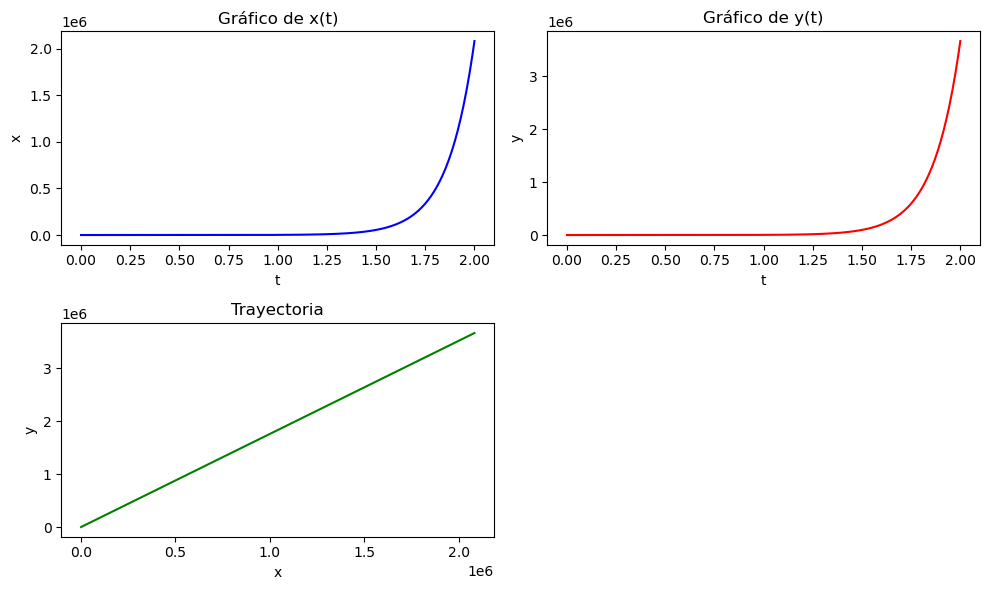

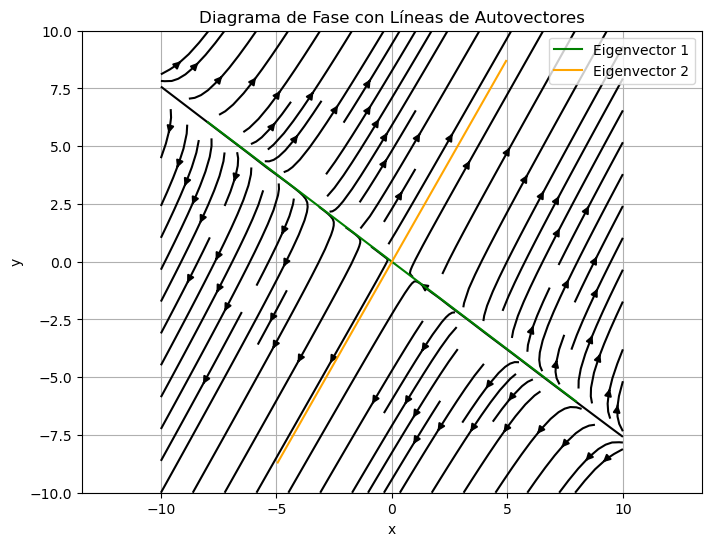

In [13]:
# Ingresar y verificar la matriz 2x2
matriz = ingresar_matriz()

# Ingresar y verificar los valores de t, x0 y y0
t0, x0, y0 = ingresar_condiciones()

# Mostrar los resulta1dos
print("\nMatriz 2x2 ingresada:")
print(matriz)

print(f"\nValores ingresados:")
print(f"t = {t0}")
print(f"x0 = {x0}")
print(f"y0 = {y0}")

eigenvalues, eigenvectors, category = classify_eigenvalues(matriz)

if category == "Valores propios imaginarios":
  opcion_complejo(eigenvalues,eigenvectors,t0,x0,y0)
  graf_3(eigenvalues,eigenvectors,t0,x0,y0)
  graf_diagrama_3(matriz)
elif category == "Valores propios iguales":
  opcion_igualdad(matriz,t0,x0,y0)
  graf_2(matriz,t0,x0,y0)
  graf_diagrama_2(matriz)
else:
  opcion_desigualdad(matriz,t0,x0,y0)
  graf(matriz,t0,x0,y0)
  graf_diagrama(matriz)